# Lab 1
# Introduction to basic concepts
# ---------------------------------------------------

<h2>Table of Contents</h2>

<div class="alert alert-block alert-info" style="margin-top: 20px">
<ol>
    <li> Import Data </li>
    <li> Data set description </li>
    <li> Descriptive Statistical Analysis </li>
    <li> Analyzing Feature Patterns using Visualization </li>
    <li> Basics of Grouping </li>
    <li> Dealing with missing values </li>
    <li> Dealing with outliers </li>
    <li> Dealing with imbalaced classes </li>
    <li> Feature transformation. One hot encoding  </li>
    <li> Normalization  </li>
    <li> Correlation  </li>
    <li> Training, validation and test sets </li>
   
</ol>

</div>

<hr>


This lab is focused on familiarizing the student with basic concepts of automatic learning: introduction, data visualization, pre-processing, data cleaning and generation of training and test subsets. 

## 1.- Import data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
from matplotlib import pyplot as plt

In [2]:
#Load data from csv and store it in dataframe
data = pd.read_csv("pima_indian_diabetes.csv") #We can change this database

# We show the first 
data.head() # Return the first n rows.

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


## 2.- Data set description - "Pima Indian Diabetes" 

 In this data set the goal is to predict, based on diagnostic measurements, whether a patient has diabetes. All patients here are females at least 21 years old of Pima Indian heritage.

* Pregnancies: Number of times pregnant
* Glucose: Plasma glucose concentration a 2 hours in an oral glucose tolerance test
* BloodPressure: Diastolic blood pressure (mm Hg)
* SkinThickness: Triceps skin fold thickness (mm)
* Insulin: 2-Hour serum insulin (mu U/ml)
* BMI: Body mass index (weight in kg/(height in m)^2)
* DiabetesPedigreeFunction: Diabetes pedigree function
* Age: Age (years)
* Outcome: Class variable (0 or 1)

#### a) Indicate for each variable what type it is (numerical, categorical, etc.).

In [3]:
data.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

#### b) Columns name

In [4]:
data.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

#### c) Add a categorical variable

In [56]:
category=pd.cut(data.Age,bins=[0,2,17,40,65,99],labels=['Baby','Child','Adult1', 'Adult2','Elderly'])
data.insert(8,'AgeCategory', category)
data.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'AgeCategory', 'Outcome'],
      dtype='object')

In [57]:
data.dtypes

Pregnancies                    int64
Glucose                        int64
BloodPressure                  int64
SkinThickness                  int64
Insulin                        int64
BMI                          float64
DiabetesPedigreeFunction     float64
Age                            int64
AgeCategory                 category
Outcome                        int64
dtype: object

In [58]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,AgeCategory,Outcome
0,6,148,72,35,0,33.6,0.627,50,Adult2,1
1,1,85,66,29,0,26.6,0.351,31,Adult1,0
2,8,183,64,0,0,23.3,0.672,32,Adult1,1
3,1,89,66,23,94,28.1,0.167,21,Adult1,0
4,0,137,40,35,168,43.1,2.288,33,Adult1,1


## 3.- Descriptive Statistical Analysis

In [7]:
# Describe data
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [8]:
data.describe(include='all') 

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,AgeCategory,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768,768.000000
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Adult1,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,574,NaN
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,NaN,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,NaN,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,NaN,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,NaN,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,NaN,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,NaN,1.000000


In [9]:
# Number of entries in the dataset:
print(data.shape)

(768, 10)


In [10]:
# Total number of unique values per variable
print(data.nunique())

Pregnancies                  17
Glucose                     136
BloodPressure                47
SkinThickness                51
Insulin                     186
BMI                         248
DiabetesPedigreeFunction    517
Age                          52
AgeCategory                   3
Outcome                       2
dtype: int64


In [11]:
data["Pregnancies"].value_counts() 

1     135
0     111
2     103
3      75
4      68
5      57
6      50
7      45
8      38
9      28
10     24
11     11
13     10
12      9
14      2
15      1
17      1
Name: Pregnancies, dtype: int64

In [12]:
data["Outcome"].value_counts() 

0    500
1    268
Name: Outcome, dtype: int64

In [13]:
data["AgeCategory"].value_counts() 

Adult1     574
Adult2     181
Elderly     13
Child        0
Baby         0
Name: AgeCategory, dtype: int64

## 4.- Analyzing Feature Patterns using Visualization

#### a) Visualize the histograms of the variables in the database, choosing a number of intervals suitable for each variable. Justify this choice.

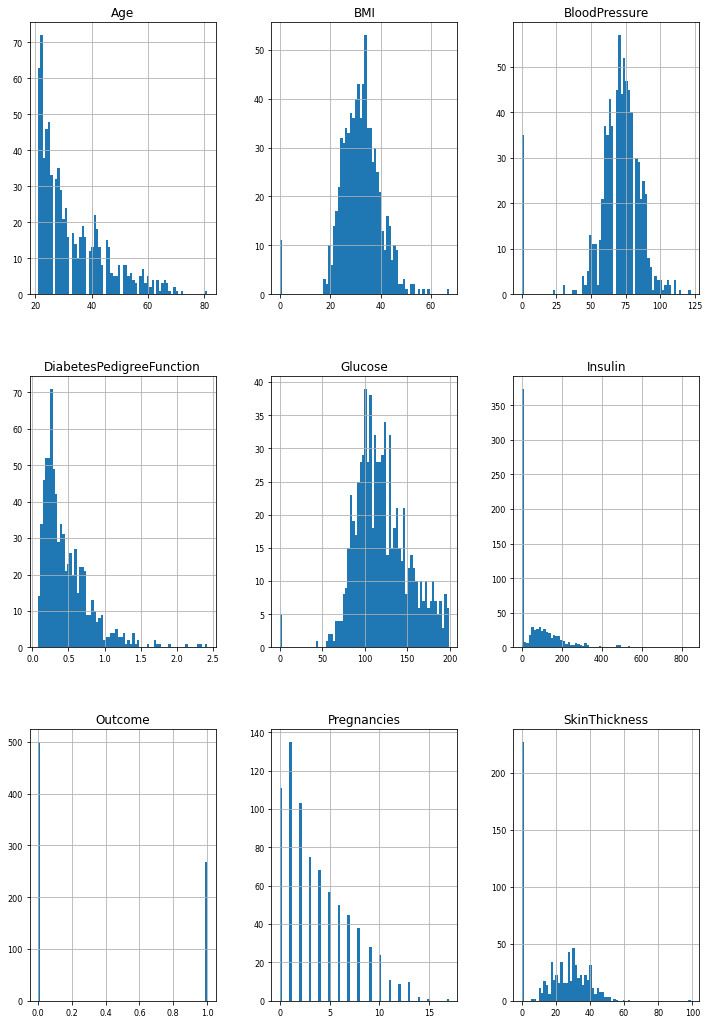

In [14]:
# Histogram
data.hist(figsize=(12, 18), bins=70, xlabelsize=8, ylabelsize=8); 

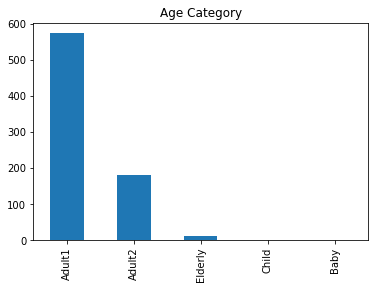

In [15]:
# Plot the age category
data['AgeCategory'].value_counts().plot.bar(title="Age Category")

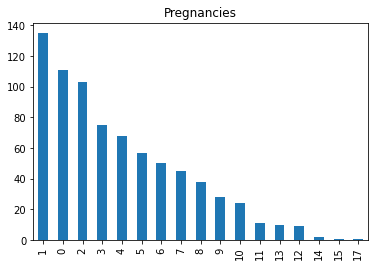

In [16]:
# Plot the number of cases and control
data['Pregnancies'].value_counts().plot.bar(title="Pregnancies")

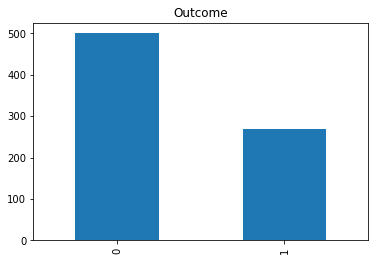

In [17]:
# Plot the number of cases and control
data['Outcome'].value_counts().plot.bar(title="Outcome")

#### b) Plot boxplots

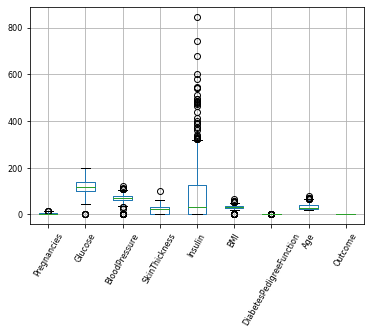

In [18]:
boxplot = data.boxplot(grid=True, rot=60, fontsize=8)

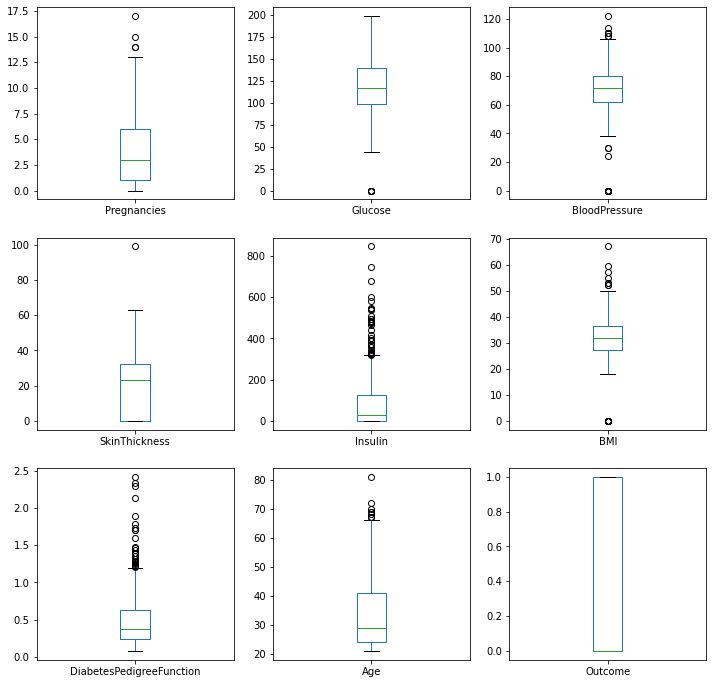

In [19]:
data.plot(kind='box',subplots=True, layout=(3,3), sharex=False, sharey=False, figsize=(12,12))
plt.show()

#### c) Plot scatter plots

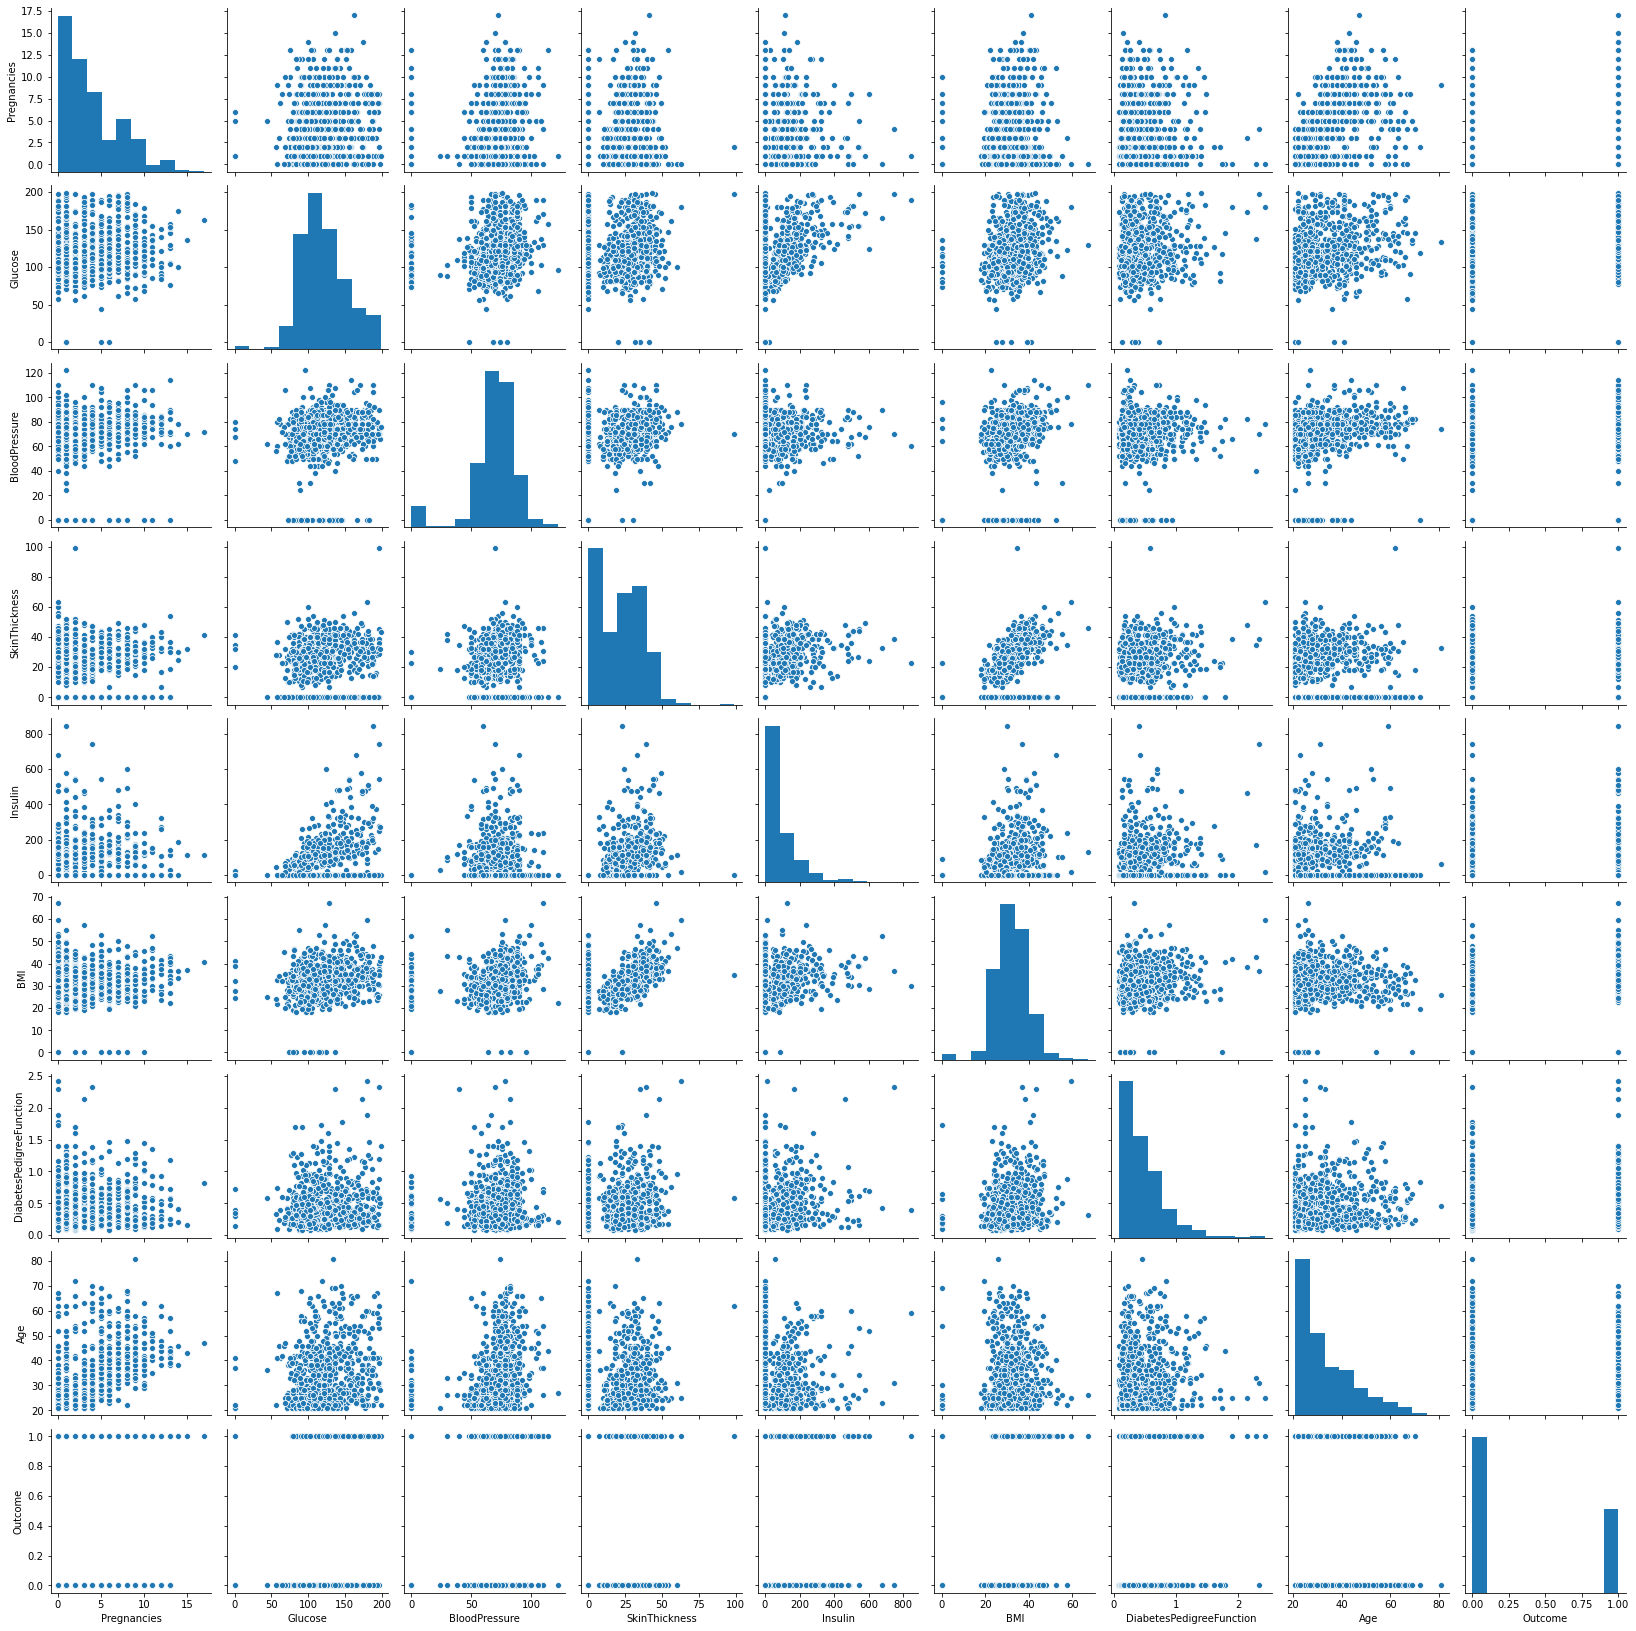

In [20]:
# Scatter plots
sns.pairplot(data)

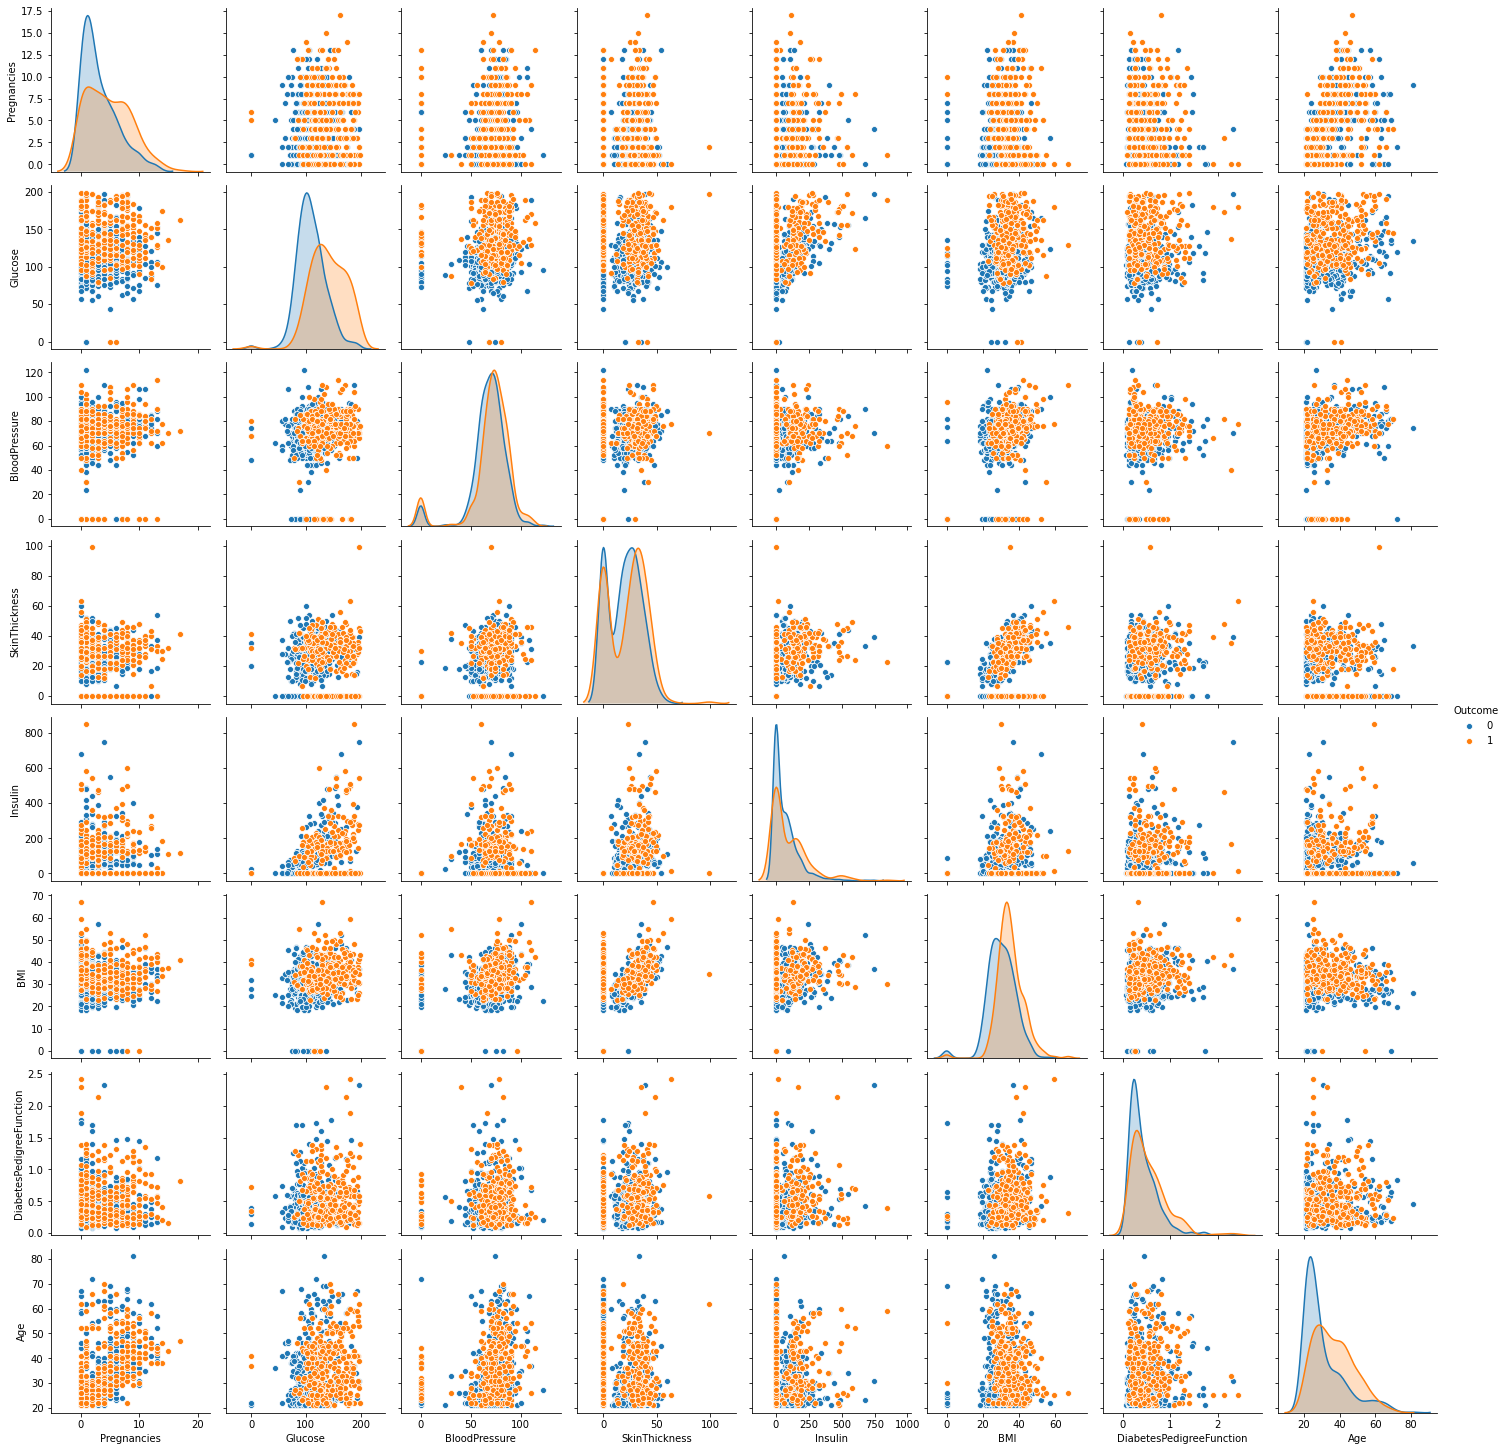

In [21]:
sns.pairplot(data, hue = 'Outcome')

Useful link: https://seaborn.pydata.org/tutorial/categorical.html

## 5.- Basics of Grouping

In [22]:
data.groupby(['Outcome', 'AgeCategory']).mean() 

Pregnancies     Glucose  BloodPressure  SkinThickness  \
Outcome AgeCategory                                                          
0       Baby                 NaN         NaN            NaN            NaN   
        Child                NaN         NaN            NaN            NaN   
        Adult1          2.607843  108.401961      66.745098      20.703431   
        Adult2          6.457831  115.891566      75.180723      16.289157   
        Elderly         5.444444  127.000000      68.888889       3.666667   
1       Baby                 NaN         NaN            NaN            NaN   
        Child                NaN         NaN            NaN            NaN   
        Adult1          3.620482  139.716867      66.512048      23.295181   
        Adult2          7.010204  143.112245      77.530612      20.969388   
        Elderly         4.000000  159.750000      85.500000       4.500000   

                        Insulin        BMI  DiabetesPedigreeFunction  \
Outcome AgeCategory                                                    
0       Baby                NaN        NaN                       NaN   
        Child               NaN        NaN                       NaN   
        Adult1        75.428922  30.093627                  0.426645   
        Adult2        42.903614  32.093976                  0.436795   
        Elderly        6.666667  23.344444                  0.504667   
1       Baby                NaN        NaN                       NaN   
        Child               NaN        NaN                       NaN   
        Adult1        98.939759  35.821084                  0.581711   
        Adult2       106.795918  34.018367                  0.501347   
        Elderly        0.000000  34.525000                  0.459500   

                           Age  
Outcome AgeCategory             
0       Baby               NaN  
        Child              NaN  
        Adult1       26.504902  
        Adult2       50.072289  
        Elderly      69.444444  
1       Baby               NaN  
        Child              NaN  
        Adult1       29.891566  
        Adult2       47.989796  
        Elderly      67.250000

It seems that mean values when the Outcome is 1 is higher almost for all variables (features)

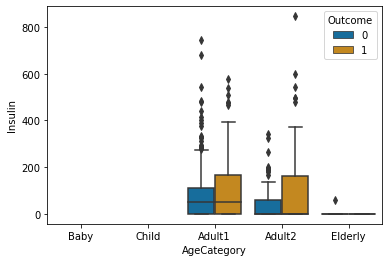

In [23]:
sns.boxplot(y='Insulin', x='AgeCategory',  
                 data=data, 
                 palette="colorblind",
                 hue='Outcome')


## 6.- Dealing with missing values

#### a) Indicate which variables present null values and justify how you have identified them.


In [24]:
# Missing values
data.isnull().values.any()

False

In [25]:
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
AgeCategory                 0
Outcome                     0
dtype: int64

In [26]:
# Identify the number of '0' values per feature
(data == 0).sum(axis=0)

Pregnancies                 111
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
AgeCategory                   0
Outcome                     500
dtype: int64

In [27]:
# Identify the number of '0' values per observation
(data == 0).sum(axis=1)

0      1
1      2
2      2
3      1
4      1
      ..
763    1
764    2
765    1
766    2
767    2
Length: 768, dtype: int64

Are all of them missing values? we need clinical/expert knowlegde, for example, BMI cannot be 0; Glucose cannot be zero

##### What can we do?

We can eliminate these observations or we can replace them with a constant or with a statistic <h4> Try to do it </h4>

#### b) Replace null with constant ('0')



In [28]:
# We don't have this situation in our database
#data['Pregnancies '] = data['Pregnancies '].fillna(0)

#### c) Replace zeros with mean value

In [29]:
nonzero_mean = data[data != 0 ].mean()
print(nonzero_mean)

Pregnancies                   4.494673
Glucose                     121.686763
BloodPressure                72.405184
SkinThickness                29.153420
Insulin                     155.548223
BMI                          32.457464
DiabetesPedigreeFunction      0.471876
Age                          33.240885
Outcome                       1.000000
dtype: float64


In [30]:
data["SkinThickness"].replace([0],data["SkinThickness"].mean(), inplace=True)

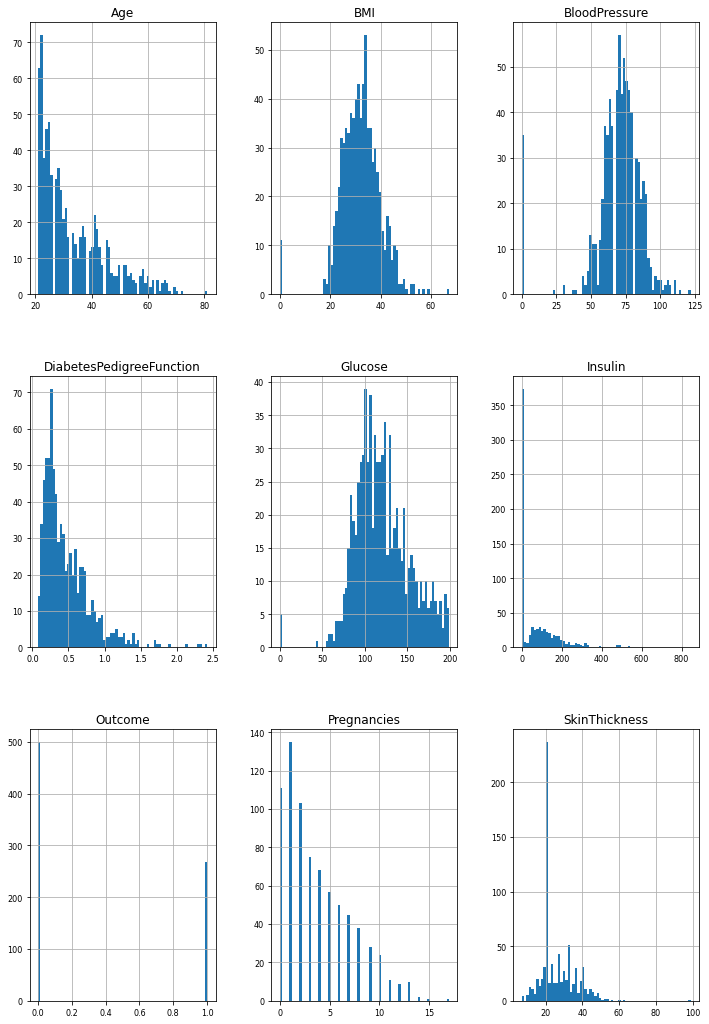

In [31]:
# Histogram
data.hist(figsize=(12, 18), bins=70, xlabelsize=8, ylabelsize=8); 

## 7.- Dealing with outliers

a) Indicate which variables present anomalous values that could be eliminated and justify how you have identified them. You can rely on other visualization tools not seen in theory, such as the box plots.

<h4> Try to do it </h4>

#### a) Identifying outliers with zscore
Use z-score for each sample on the data set and specific a threshold (for example 2.5, 3, 3.5 or more standard deviations).

In [32]:

import pandas as pd
from scipy import stats
# calculate z-scores with stats
z_scores = stats.zscore(data['BMI'])

# Here, we are considering 3 times the standard desviation
abs_z_scores = np.abs(z_scores)
no_outliers = (abs_z_scores < 3)
new_data = data[no_outliers]

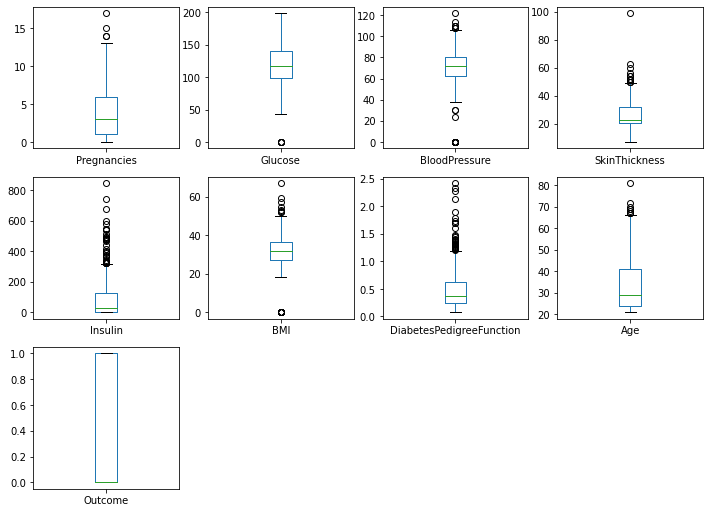

In [33]:
data.plot(kind='box',subplots=True, layout=(4,4), sharex=False, sharey=False, figsize=(12,12))
plt.show()

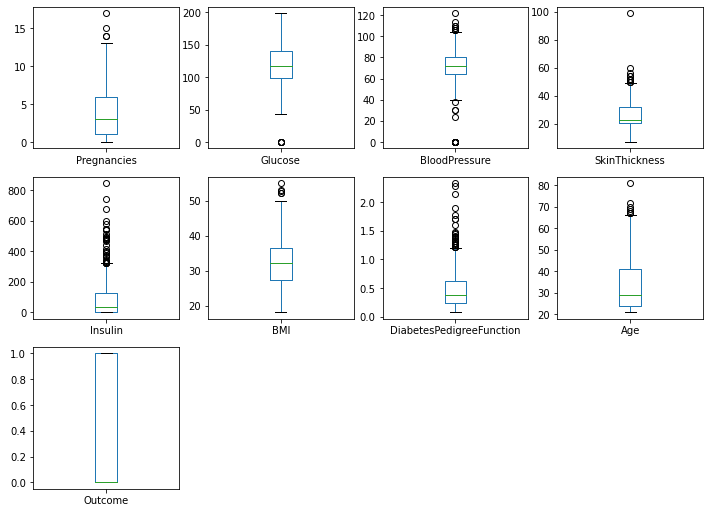

In [34]:
new_data.plot(kind='box',subplots=True, layout=(4,4), sharex=False, sharey=False, figsize=(12,12))
plt.show()

[ 16  39  57  86  99 120 150 177 211 254 273 275 370 409 422 428 445 458
 519 532 539 575 579 580 591 625 657 662 663 689 693 718 763]
26.606479220920118


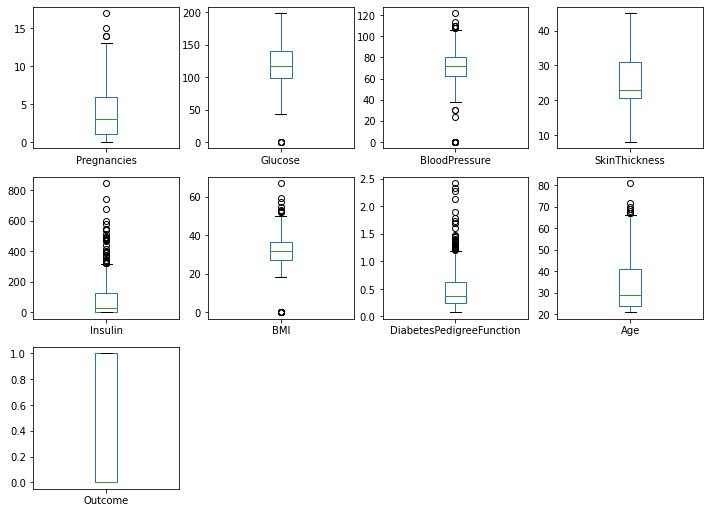

In [35]:
# SkinThickness
z_scores1 = stats.zscore(data['SkinThickness'])
abs_z_scores1 = np.abs(z_scores1)
outliers1 = (abs_z_scores1 > 2)
print(np.where(outliers1)[0])
print(data['SkinThickness'].mean())
data["SkinThickness"] = data["SkinThickness"].where(~(outliers1), data["SkinThickness"].mean())
data.plot(kind='box',subplots=True, layout=(4,4), sharex=False, sharey=False, figsize=(12,12))
plt.show()

#### b) Identifying Outliers with Interquartile Range

In [36]:
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

Pregnancies                   5.000000
Glucose                      41.250000
BloodPressure                18.000000
SkinThickness                10.463542
Insulin                     127.250000
BMI                           9.300000
DiabetesPedigreeFunction      0.382500
Age                          17.000000
Outcome                       1.000000
dtype: float64


## 8.- Dealing with imbalance classes
This occurs when the number of samples in one class is much higher than the number of samples in the another class. 

#### a) Undersampling
Remove randomly from the majority class, with or without replacement. 

In [37]:

from imblearn.under_sampling import RandomUnderSampler
undersample = RandomUnderSampler(sampling_strategy='majority')

The positive label considered as the minority class is 1


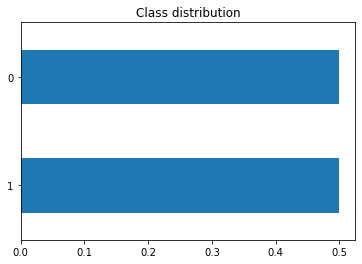

In [38]:
from collections import Counter
X_res, y_res  = undersample.fit_resample(data[data.columns.difference(['Outcome','col'])],data.loc[:,'Outcome'])
Counter(y_res)

class_distribution = pd.Series(y_res).value_counts(normalize=True)
ax = class_distribution.plot.barh()
ax.set_title("Class distribution")
pos_label = class_distribution.idxmin()
print(f"The positive label considered as the minority class is {pos_label}")


#### b) Random Oversampling 
Randomly duplicate examples in the minority class.

In [39]:
from imblearn.over_sampling import RandomOverSampler
oversample = RandomOverSampler(sampling_strategy='minority')
X_over, y_over = oversample.fit_resample(data[data.columns.difference(['Outcome','col'])],data.loc[:,'Outcome'])
print(Counter(y_over))


Counter({1: 500, 0: 500})


#### C) SMOTE 

SMOTE is a method that over-sampling the minority (abnormal) class 
https://arxiv.org/abs/1106.1813

https://imbalanced-learn.org/stable/references/generated/imblearn.over_sampling.SMOTE.html#imblearn.over_sampling.SMOTE

In [40]:
from imblearn.over_sampling import SMOTE 
sm = SMOTE(random_state=42)
X=data[data.columns.difference(['Outcome','col', 'AgeCategory'])] # Delete categorical data
y=data.loc[:,'Outcome']
X_smote, y_smote = sm.fit_resample(X, y)
print('Samples %s' % Counter(y_smote))


Samples Counter({1: 500, 0: 500})


## 9.- Feature transformation. One hot encoding 

In [43]:
from sklearn.preprocessing import OneHotEncoder
# creating instance of one-hot-encoder
enc = OneHotEncoder(handle_unknown='ignore')
enc_data = pd.DataFrame(enc.fit_transform(data[['AgeCategory']]).toarray())
data['AgeCategory'].value_counts() # Identifity categories
enc_data.describe()

data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,25.666393,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,7.920784,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,8.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,20.536458,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,31.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,45.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [44]:
ageCateogy_onehot = pd.get_dummies(data.AgeCategory, prefix='Age')
print(ageCateogy_onehot .head())

   Age_Baby  Age_Child  Age_Adult1  Age_Adult2  Age_Elderly
0         0          0           0           1            0
1         0          0           1           0            0
2         0          0           1           0            0
3         0          0           1           0            0
4         0          0           1           0            0


In [45]:
data = pd.concat([data,pd.get_dummies(data['AgeCategory'], prefix='Age')],axis=1)
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Age_Baby,Age_Child,Age_Adult1,Age_Adult2,Age_Elderly
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.0,768.0,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,25.666393,79.799479,31.992578,0.471876,33.240885,0.348958,0.0,0.0,0.747396,0.235677,0.016927
std,3.369578,31.972618,19.355807,7.920784,115.244002,7.884160,0.331329,11.760232,0.476951,0.0,0.0,0.434789,0.424698,0.129082
min,0.000000,0.000000,0.000000,8.000000,0.000000,0.000000,0.078000,21.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000
25%,1.000000,99.000000,62.000000,20.536458,0.000000,27.300000,0.243750,24.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000,0.0,0.0,1.000000,0.000000,0.000000
75%,6.000000,140.250000,80.000000,31.000000,127.250000,36.600000,0.626250,41.000000,1.000000,0.0,0.0,1.000000,0.000000,0.000000
max,17.000000,199.000000,122.000000,45.000000,846.000000,67.100000,2.420000,81.000000,1.000000,0.0,0.0,1.000000,1.000000,1.000000


## 10.- Normalization

#### a) Using MinMaxScaler()

In [47]:
from sklearn import preprocessing
scaler = preprocessing.MinMaxScaler()

# Delete categorical feature 'AgeCategory'
data=data.drop(['AgeCategory'], axis=1)

# All values are now between [0,1]
data_minmax = scaler.fit_transform(data)
scaled_data = pd.DataFrame(data_minmax, columns=data.columns)
scaled_data.describe()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Age_Baby,Age_Child,Age_Adult1,Age_Adult2,Age_Elderly
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.0,768.0,768.000000,768.000000,768.000000
mean,0.226180,0.607510,0.566438,0.477470,0.094326,0.476790,0.168179,0.204015,0.348958,0.0,0.0,0.747396,0.235677,0.016927
std,0.198210,0.160666,0.158654,0.214075,0.136222,0.117499,0.141473,0.196004,0.476951,0.0,0.0,0.434789,0.424698,0.129082
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000
25%,0.058824,0.497487,0.508197,0.338823,0.000000,0.406855,0.070773,0.050000,0.000000,0.0,0.0,0.000000,0.000000,0.000000
50%,0.176471,0.587940,0.590164,0.405405,0.036052,0.476900,0.125747,0.133333,0.000000,0.0,0.0,1.000000,0.000000,0.000000
75%,0.352941,0.704774,0.655738,0.621622,0.150414,0.545455,0.234095,0.333333,1.000000,0.0,0.0,1.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,0.0,1.000000,1.000000,1.000000


In [48]:
# Using minmax scaler, but now the range is [0,2]
scaler1 = preprocessing.MinMaxScaler(feature_range=(0, 2))
data_minmax1 = scaler1.fit_transform(data)
scaled_data1 = pd.DataFrame(data_minmax1, columns=data.columns)
scaled_data1.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Age_Baby,Age_Child,Age_Adult1,Age_Adult2,Age_Elderly
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.0,768.0,768.000000,768.000000,768.000000
mean,0.452359,1.215020,1.132877,0.954940,0.188651,0.953579,0.336359,0.408030,0.697917,0.0,0.0,1.494792,0.471354,0.033854
std,0.396421,0.321333,0.317308,0.428151,0.272444,0.234997,0.282945,0.392008,0.953903,0.0,0.0,0.869578,0.849396,0.258165
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000
25%,0.117647,0.994975,1.016393,0.677646,0.000000,0.813711,0.141546,0.100000,0.000000,0.0,0.0,0.000000,0.000000,0.000000
50%,0.352941,1.175879,1.180328,0.810811,0.072104,0.953800,0.251494,0.266667,0.000000,0.0,0.0,2.000000,0.000000,0.000000
75%,0.705882,1.409548,1.311475,1.243243,0.300827,1.090909,0.468190,0.666667,2.000000,0.0,0.0,2.000000,0.000000,0.000000
max,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,0.0,0.0,2.000000,2.000000,2.000000


#### b) Standardization
By applying standardization, each column will have mean  0 and the standard deviation 1

In [49]:
from sklearn.preprocessing import StandardScaler
scale= StandardScaler()
prep = scale.fit_transform(data)
standard_data = pd.DataFrame(prep, columns=data.columns)
standard_data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Age_Baby,Age_Child,Age_Adult1,Age_Adult2,Age_Elderly
count,7.680000e+02,7.680000e+02,7.680000e+02,7.680000e+02,7.680000e+02,7.680000e+02,7.680000e+02,7.680000e+02,7.680000e+02,768.0,768.0,7.680000e+02,7.680000e+02,7.680000e+02
mean,2.544261e-17,3.614007e-18,-1.327244e-17,2.661355e-16,-3.556183e-17,2.295979e-16,2.398978e-16,1.857600e-16,2.408374e-16,0.0,0.0,1.530893e-16,1.421028e-16,6.583276e-16
std,1.000652e+00,1.000652e+00,1.000652e+00,1.000652e+00,1.000652e+00,1.000652e+00,1.000652e+00,1.000652e+00,1.000652e+00,0.0,0.0,1.000652e+00,1.000652e+00,1.000652e+00
min,-1.141852e+00,-3.783654e+00,-3.572597e+00,-2.231838e+00,-6.928906e-01,-4.060474e+00,-1.189553e+00,-1.041549e+00,-7.321202e-01,0.0,0.0,-1.720105e+00,-5.552905e-01,-1.312194e-01
25%,-8.448851e-01,-6.852363e-01,-3.673367e-01,-6.480769e-01,-6.928906e-01,-5.955785e-01,-6.889685e-01,-7.862862e-01,-7.321202e-01,0.0,0.0,-1.720105e+00,-5.552905e-01,-1.312194e-01
50%,-2.509521e-01,-1.218877e-01,1.496408e-01,-3.368518e-01,-4.280622e-01,9.419788e-04,-3.001282e-01,-3.608474e-01,-7.321202e-01,0.0,0.0,5.813597e-01,-5.552905e-01,-1.312194e-01
75%,6.399473e-01,6.057709e-01,5.632228e-01,6.738073e-01,4.120079e-01,5.847705e-01,4.662269e-01,6.602056e-01,1.365896e+00,0.0,0.0,5.813597e-01,-5.552905e-01,-1.312194e-01
max,3.906578e+00,2.444478e+00,2.734528e+00,2.442461e+00,6.652839e+00,4.455807e+00,5.883565e+00,4.063716e+00,1.365896e+00,0.0,0.0,5.813597e-01,1.800859e+00,7.620822e+00


## 11.- Correlation

#### Plot the dispersion matrix

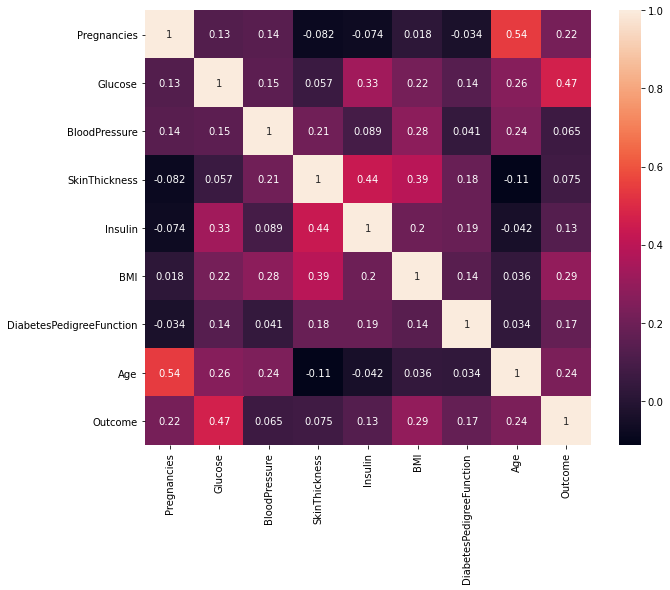

In [51]:
data = pd.read_csv("pima_indian_diabetes.csv") #We can change this database
f, ax = plt.subplots(figsize=(10, 8))
corr = data.corr()
sns.heatmap(corr,annot=True,
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

In [52]:
data.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


#### We cannot use Pearson Correlation
You can use chi2 instead, check: https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.chi2_contingency.html
for details:

Some code:
chi2, p, dof, ex = chi2_contingency(obs, correction=False)


##  12.-  Training, validation and test sets

In this section, the available cases will be separated into two subsets: a training subset and a test subset. The subsets will not share any case in common. The training subset will be used in the next modules to perform the learning of some models, and the test subset to evaluate their performance. 

Before perform the separation into subsets, respond in a reasoned manner (justifying your response) to
the following issues:


a) What percentage of available cases will you consider in the training subset? And in the test subset?

b) Consider that you build a binary classifier (two classes, C1 and C2). Discuss what would happen when evaluating the classifier's performance if the training subset with which the classifier is designed had almost all the cases of class C1 and the test subset had almost all the cases of class C2.

c) How could you avoid overtraining in the design of the classifier? What would be the
process to be followed to find the best parameters of that model?


d) Explain which tools, from those presented in the course, you would use to roughly check whether each variable in the test subset follows the same distribution as the corresponding variable in the training subset.


e) Discuss what you should do with the original data set if you find that the distribution
of the test subset cases is different from the distribution of the
training subset.

### Hangs on!

In [53]:
#Create input and output dataa
x = data[["Pregnancies", "Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI", "DiabetesPedigreeFunction", "Age"]]
y = data["Outcome"]

x.shape, y.shape

((768, 8), (768,))

In [416]:
# Split the data set in two different subsets: training and test
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle

x, y = shuffle(x,y, random_state=0)      # The random state is used to obtain always ths same partition
X_train, X_test, Y_train, Y_test = train_test_split(x, y,random_state=0)

In [415]:
# Normalize variables
# IMPORTANT!! You will use the mean and the standard desviation of the training set, to normalize the test set
# In a real scenario, you don't know the test set in advance
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)
X_train_norm = scaler.transform(X_train)
X_test_norm = scaler.transform(X_test)

#### a) Cross validation -  KFold 
It divides the dataset in groups of samples, called folds of equal sizes

In [425]:
from sklearn.model_selection import KFold
X_example = ["a", "b", "c", "d", "e", "f"]
kf = KFold(n_splits=3)  # In this case, k=3, 
for train, val in kf.split(X_example):
    print("%s %s" % (train, val))

[2 3 4 5] [0 1]
[0 1 4 5] [2 3]
[0 1 2 3] [4 5]


#### b) Leave One Out
Also called simple cross-validation. Each new set of samples is created by taking all the samples except one, the test set being the sample left out

In [427]:
from sklearn.model_selection import LeaveOneOut
loo = LeaveOneOut()     
for train, test in loo.split(X_example):
    print("%s %s" % (train, val))

[1 2 3 4 5] [0]
[0 2 3 4 5] [1]
[0 1 3 4 5] [2]
[0 1 2 4 5] [3]
[0 1 2 3 5] [4]
[0 1 2 3 4] [5]


#### c) Stratify k-fold 
In this case, each set of samples has approximately the same percentage of samples of each class

Check this for more details: https://scikit-learn.org/stable/modules/cross_validation.html#stratified-k-fold